# 模型评估与优化
## 使用交叉验证进行模型评估
除了拟合测试数据集之外，我们还可以用一种更加粗暴的方法验证模型表现，那就是交叉验证(Cross Validation)。
### 交叉验证法
将数据集拆分成k个，依次将其中一个做为测试集，其他作为训练集。

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

wine = load_wine()
svc = SVC(kernel='linear')

scores = cross_val_score(svc, wine.data, wine.target)
print('交叉验证得分：{}'.format(scores))

交叉验证得分：[0.88888889 0.94444444 0.97222222 1.         1.        ]


In [3]:
print('交叉验证平均分：{:.3f}'.format(scores.mean()))

交叉验证平均分：0.961


In [2]:
scores = cross_val_score(svc, wine.data, wine.target, cv=10)
print('交叉验证得分：\n{}'.format(scores))

交叉验证得分：
[0.88888889 0.94444444 0.88888889 0.94444444 0.94444444 0.94444444
 1.         1.         1.         1.        ]


In [4]:
print('交叉验证平均分：{:.3f}'.format(scores.mean()))

交叉验证平均分：0.956


In [5]:
print('酒的分类标签:\n{}'.format(wine.target))
# 分类标签的比例基本一致

酒的分类标签:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### 随机拆分(shuffle-split cross validation)和留一法(Leave-One-Out)

In [6]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.2, train_size=.7,
                             n_splits = 10)
scores = cross_val_score(svc, wine.data, wine.target, cv=shuffle_split)
print('随机拆分交叉验证模型得分：\n{}'.format(scores))

随机拆分交叉验证模型得分：
[1.         0.91666667 0.97222222 0.97222222 0.97222222 0.97222222
 1.         0.97222222 0.94444444 0.94444444]


In [8]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
scores = cross_val_score(svc, wine.data, wine.target, cv=cv)
print('迭代次数:{}'.format(len(scores)))
print("模型平均分：{:.3f}".format(scores.mean()))

迭代次数:178
模型平均分：0.955


**为什么要交叉验证**:  
- train_test_split 过于随机
- train_test_split 比例不够灵活
- 交叉验证更加耗费资源

## 使用网格搜索优化模型参数
### 简单网格搜索
网格搜索其实就是穷举，把所有参数的组合情况遍历一遍得到模型分数

In [7]:
# 循环遍历所有参数
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(wine.data, 
                                                 wine.target,
                                                 random_state=38)
best_score = 0
for alpha in [0.01,0.1,1.0,10.0]:
    for max_iter in [100,1000,5000,10000]:
        lasso = Lasso(alpha=alpha,max_iter=max_iter)
        lasso.fit(X_train, y_train)
        score = lasso.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters={'alpha':alpha,'最大迭代次数':max_iter}
            
print("模型最高分为：{:.3f}".format(best_score))
print('最佳参数设置：{}'.format(best_parameters))

模型最高分为：0.889
最佳参数设置：{'alpha': 0.01, '最大迭代次数': 100}


In [8]:
# 改了一下随机种子，变化很大
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(wine.data, 
                                                 wine.target,
                                                 random_state=68)
best_score = 0
for alpha in [0.01,0.1,1.0,10.0]:
    for max_iter in [100,1000,5000,10000]:
        lasso = Lasso(alpha=alpha,max_iter=max_iter)
        lasso.fit(X_train, y_train)
        score = lasso.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters={'alpha':alpha,'最大迭代次数':max_iter}
            
print("模型最高分为：{:.3f}".format(best_score))
print('最佳参数设置：{}'.format(best_parameters))

模型最高分为：0.820
最佳参数设置：{'alpha': 0.01, '最大迭代次数': 100}


### 与交叉验证结合的网格搜索

In [11]:
import numpy as np
for alpha in [0.01,0.1,1.0,10.0]:
    for max_iter in [100,1000,5000,10000]:
        lasso = Lasso(alpha=alpha,max_iter=max_iter)
        scores = cross_val_score(lasso, X_train, y_train, cv=6)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters={'alpha':alpha, '最大迭代数':max_iter}
            
print("模型最高分为：{:.3f}".format(best_score))
print('最佳参数设置：{}'.format(best_parameters))

模型最高分为：0.880
最佳参数设置：{'alpha': 0.01, '最大迭代数': 100}


In [9]:
lasso = Lasso(alpha=0.01, max_iter=100).fit(X_train, y_train)
print('测试数据集得分：{:.3f}'.format(lasso.score(X_test,y_test)))

测试数据集得分：0.820


In [10]:
# 利用GridSearchCV来进行快速的参数调优
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.01,0.1,1.0,10.0],
         'max_iter':[100,1000,5000,10000]}
grid_search = GridSearchCV(lasso,params,cv=100)
grid_search.fit(X_train, y_train)
print('模型最高分：{:.3f}'.format(grid_search.score(X_test, y_test)))
print('最优参数：{}'.format(grid_search.best_params_))
# 网格搜索功能强大，但需要的时间很长

/Users/yy/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/yy/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/yy/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/yy/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/yy/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less tha

模型最高分：0.820
最优参数：{'alpha': 0.01, 'max_iter': 100}


/Users/yy/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/yy/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/yy/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/yy/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/yy/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less tha

In [11]:
print('交叉验证最高得分：{:.3f}'.format(grid_search.best_score_))

交叉验证最高得分：nan


## 分类模型的可信度评估
### 分类模型中的准确率
关于分类模型的predict_proba

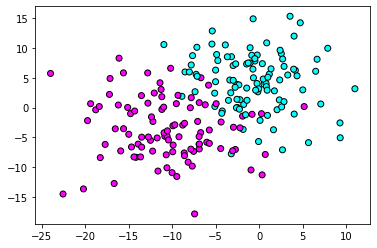

In [18]:
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y=make_blobs(n_samples=200, random_state=1,centers=2,cluster_std=5)
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.cool, edgecolor='k')
plt.show()

In [19]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=68)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predict_proba = gnb.predict_proba(X_test)
print('预测准确率形态：{}'.format(predict_proba.shape))

预测准确率形态：(50, 2)


In [20]:
print(predict_proba[:5])

[[0.98849996 0.01150004]
 [0.0495985  0.9504015 ]
 [0.01648034 0.98351966]
 [0.8168274  0.1831726 ]
 [0.00282471 0.99717529]]


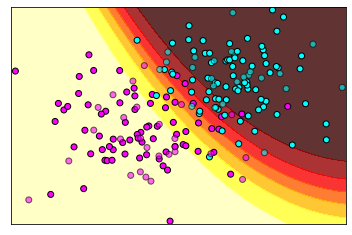

In [23]:
import numpy as np
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

Z = gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.hot, alpha=.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.cool,
                   edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.cool,
                   edgecolor='k', alpha=0.6)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

不是所有模型都有predict_proba属性，但我们还有另一种方法，那就是决定系数decision_function
### 分类模型中的决定系数
在二元分类里，正数代表属于分类1，负数代表属于分类2

In [24]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
dec_func = svc.decision_function(X_test)
print (dec_func[:5])

[-1.36071347  1.53694862  1.78825594 -0.96133081  1.81826853]


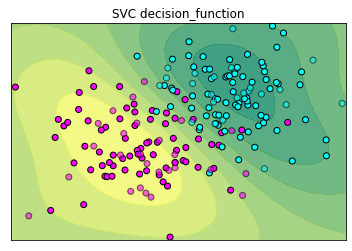

In [25]:
Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.summer, alpha=.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.cool,
                   edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.cool,
                   edgecolor='k', alpha=0.6)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC decision_function')
plt.xticks(())
plt.yticks(())
plt.show()